## Capital Gains Tracker
### AD325 Project 1

<img> UML diagram

In [1]:
from stock_ledger import StockLedger
from trading_bot import *
from capital_gains_helper_methods import *
import matplotlib.pyplot as plt
import copy
from stock_sale import StockSale
from stock_purchase import StockPurchase

### sellOptimal

"When the sale price is greater than the ledger entry average, make as much money as possible.", "When the sale price is less than the ledger entry average, lose as little money as possible."; both statements are effected by filling sale quantities using the lowest priced stock purchases available.

These behaviors are effected over controlled traversal of ledger entries (deques), using pointers, and gathering statistics.

### Comparing sell (queue-behavior), sellRandom (pseudorandom deque-behavior), and sellOptimal (deque-behavior):

Over a number of input strings encoding buy and sell orders (such that no sell order is greater than current number of shares).

Compare profit over each buy/sell for a single input string:

Compare average profit per share per sale.

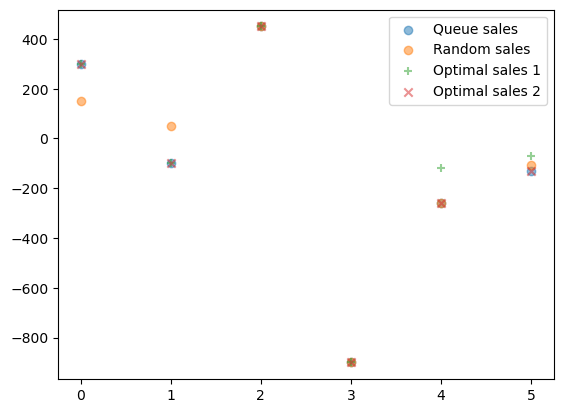

In [2]:
tb_1 = TradingBot(10000)
tb_random = copy.deepcopy(tb_1)
tb_optimal_1 = copy.deepcopy(tb_1)
tb_optimal_2 = copy.deepcopy(tb_1)
buy_sell_str = """Buy 20 shares of AAPL at $45.
Buy 20 shares of AAPL at $75.
Buy 20 shares of MSFT at $95.
Display the ledger
Sell 30 shares of AAPL at $65
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Buy 100 shares of AAPL at $20
Buy 20 shares of AAPL at $24
Buy 200 shares of TSLA at $36
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Sell 150 shares of TSLA at $30
Display the ledger
Buy 5 shares of MSFT at $60
Buy 5 shares of MSFT at $70
Display the ledger
Sell 4 shares of MSFT at $30
Display the ledger
Sell 2 shares of MSFT at $30
Display the ledger"""
string_to_trading_bot(buy_sell_str, tb_1)
string_to_random_trading_bot(buy_sell_str, tb_random)
string_to_optimal_trading_bot(buy_sell_str, tb_optimal_1, 1)
string_to_optimal_trading_bot(buy_sell_str, tb_optimal_2, 2)
plot_x = [x_i for x_i in range(len(tb_1.profit_per_sell))]
plt.figure()
plt.scatter(plot_x, tb_1.profit_per_sell, label='Queue sales', alpha=0.5)
plt.scatter(plot_x, tb_random.profit_per_sell, label='Random sales', alpha=0.5)
plt.scatter(plot_x, tb_optimal_1.profit_per_sell, label='Optimal sales 1', alpha=0.5, marker='+')
plt.scatter(plot_x, tb_optimal_2.profit_per_sell, label='Optimal sales 2', alpha=0.5, marker='x')
plt.legend()
plt.show()

In [3]:
print(tb_1)
tb_1.stock_ledger.display_total_shares()
print(tb_random)
tb_random.stock_ledger.display_total_shares()
print(tb_optimal_1)
tb_optimal_1.stock_ledger.display_total_shares()
print(tb_optimal_2)
tb_optimal_2.stock_ledger.display_total_shares()
print()
# print most recent sale:
print(tb_optimal_1.stock_sales_list[0])
print()
print(tb_optimal_2.stock_sales_list[0])
print()
print(tb_optimal_1.stock_sales_list[-1].shares)
print()
print(tb_optimal_2.stock_sales_list[-1].shares)

Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares

---- Stock Sale: AAPL ----
Cost        Price
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$45.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
$75.0         $65.0
- - - - - Total - - - - -
$300.0

---- Stock Sale: AAPL ----
Cost        Price
$45.0         $65.0
$45

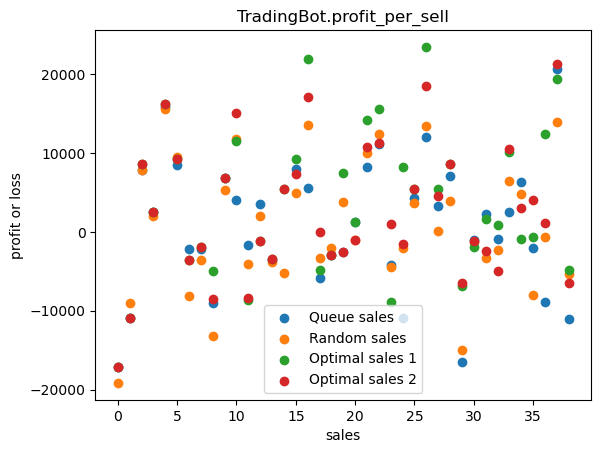

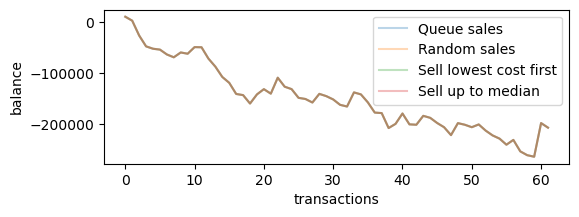

In [11]:
import numpy as np
testing_buy_sell_string = generate_buy_sell_lines_string(['AAPL', 'MSFT', 'TSLA', 'NVDA'], 100, 20, 200)[0]
testing_bot_sell = TradingBot(10000)
testing_bot_random = TradingBot(10000)
testing_bot_optimal_1 = TradingBot(10000)
testing_bot_optimal_2 = TradingBot(10000)
# interpret string as buy and sell, for each selling behavior
string_to_trading_bot(testing_buy_sell_string, testing_bot_sell)
string_to_random_trading_bot(testing_buy_sell_string, testing_bot_random)
string_to_optimal_trading_bot(testing_buy_sell_string, testing_bot_optimal_1, 1)
string_to_optimal_trading_bot(testing_buy_sell_string, testing_bot_optimal_2, 2)
# plot profit per sale
plot_x = range(len(testing_bot_sell.profit_per_sell))
plt.figure()
# plt.title('sorted(TradingBot.profit_per_sell) (not comparing same sales per bot)')
plt.title('TradingBot.profit_per_sell')
plt.scatter(plot_x, testing_bot_sell.profit_per_sell, label='Queue sales')
plt.scatter(plot_x, testing_bot_random.profit_per_sell, label='Random sales')
plt.scatter(plot_x, testing_bot_optimal_1.profit_per_sell, label='Optimal sales 1')
plt.scatter(plot_x, testing_bot_optimal_2.profit_per_sell, label='Optimal sales 2')
# plt.scatter(plot_x, sorted(testing_bot_sell.profit_per_sell), label='Queue sales')
# plt.scatter(plot_x, sorted(testing_bot_random.profit_per_sell), label='Random sales')
# plt.scatter(plot_x, sorted(testing_bot_optimal.profit_per_sell), label='Optimal sales')  # idea: sort y (not comparing same sales)
plt.legend()
plt.ylabel('profit or loss')
plt.xlabel('sales')
plt.show()
# for each_sale in testing_bot_random.stock_sales_list:
#     print(each_sale)
# Pursuing an optimal strategy (sell lowest cost shares first) may result in higher cost after the sale of shares, so it might not really be optimal
fig = plt.figure()
fig.set_size_inches(6, 2)
plt.plot(testing_bot_sell.balance_over_transactions, label='Queue sales', alpha=0.3)
plt.plot(testing_bot_random.balance_over_transactions, label='Random sales', alpha=0.3)
plt.plot(testing_bot_optimal_1.balance_over_transactions, label='Sell lowest cost first', alpha=0.3)
plt.plot(testing_bot_optimal_2.balance_over_transactions, label='Sell up to median', alpha=0.3)
plt.legend()
plt.ylabel('balance')
plt.xlabel('transactions')
plt.show()  # Upon some thought, these should each be the same line (same order of buy and sell at the same prices)

### Total profit (or loss) for sell, sellRandom, and sellOptimal

In [12]:
# sum(profit or loss) for each bot
print(f"sell: ${sum(testing_bot_sell.profit_per_sell):.2f}")
print(f"sellRandom: ${sum(testing_bot_random.profit_per_sell):.2f}")
print(f"sellOptimal 1: ${sum(testing_bot_optimal_1.profit_per_sell):.2f}")
print(f"sellOptimal 2: ${sum(testing_bot_optimal_2.profit_per_sell):.2f}")

sell: $14269.86
sellRandom: $29673.09
sellOptimal 1: $141445.16
sellOptimal 2: $103228.95


### For a number of iterations, keep track of profit / loss, display as violin plot
normalize to total revenue

In [ ]:
num_iterations = 100


In [6]:
print(testing_bot_sell)
print(testing_bot_optimal_1.stock_ledger.equals(testing_bot_optimal_1.stock_ledger))
testing_bot_sell.stock_ledger.display_ledger()
testing_bot_random.stock_ledger.display_ledger()
testing_bot_optimal_1.stock_ledger.display_ledger()
# testing_bot_optimal_2.stock_ledger.display_ledger()
testing_bot_sell.stock_ledger.display_total_shares()
testing_bot_random.stock_ledger.display_total_shares()
testing_bot_optimal_1.stock_ledger.display_total_shares()
testing_bot_optimal_2.stock_ledger.display_total_shares()

False
----  Stock Ledger  ----
MSFT: 108.63 (2 shares)   129.82 (6 shares)   174.92 (2 shares)   32.97 (7 shares)   
AAPL: 132.55 (2 shares)   81.35 (9 shares)   183.87 (2 shares)   
TSLA: 16.13 (7 shares)   19.57 (9 shares)   22.5 (3 shares)   144.58 (10 shares)   198.93 (9 shares)   180.53 (8 shares)   28.5 (6 shares)   81.04 (4 shares)   
NVDA: 182.46 (4 shares)   90.58 (8 shares)   95.61 (6 shares)   132.72 (7 shares)   
----  Stock Ledger  ----
MSFT: 32.97 (5 shares)   126.7 (2 shares)   166.18 (1 shares)   58.0 (1 shares)   103.7 (1 shares)   37.5 (1 shares)   129.82 (5 shares)   174.92 (1 shares)   
AAPL: 132.55 (1 shares)   123.35 (1 shares)   81.35 (8 shares)   183.87 (2 shares)   3.81 (1 shares)   
TSLA: 22.8 (1 shares)   172.46 (2 shares)   16.13 (2 shares)   28.36 (2 shares)   40.95 (4 shares)   19.57 (6 shares)   22.5 (2 shares)   144.58 (8 shares)   198.93 (7 shares)   125.47 (2 shares)   120.05 (2 shares)   180.53 (8 shares)   28.5 (6 shares)   81.04 (4 shares)   
NVDA: 

In [7]:
# Testing, profit should be $10
test_profit_bot_1 = TradingBot(100)
test_profit_bot_1.buy('AAPL', 1, 20)
# print(test_profit_bot_1.report_last_profit())
test_profit_bot_1.sell('AAPL', 1, 20)
# print(test_profit_bot_1.report_last_profit())  # OK Something is definitely not working. -> -18711.160000000003, -> -18731.160000000003, -> -18751.160000000003
print(test_profit_bot_1.stock_sales_list[-1])
print("StockSale.shares length: " + str(len(test_profit_bot_1.stock_sales_list[0].shares)))
# Testing, profit should be $10
test_profit_bot_1 = TradingBot(100)
test_profit_bot_1.buy('MSFT', 2, 10)
print(test_profit_bot_1.report_last_profit())
test_profit_bot_1.sell('MSFT', 2, 15)
print(test_profit_bot_1.report_last_profit())  # OK Something is definitely not working. -> -18711.160000000003, -> -18731.160000000003, -> -18751.160000000003
print(test_profit_bot_1.stock_sales_list[-1])
print("StockSale.shares length: " + str(len(test_profit_bot_1.stock_sales_list[0].shares)))  # increments by 1 (or more) for each ipynb run


---- Stock Sale: AAPL ----
Cost        Price
$20         $20
- - - - - Total - - - - -
$0
StockSale.shares length: 1
0
10
---- Stock Sale: MSFT ----
Cost        Price
$10         $15
$10         $15
- - - - - Total - - - - -
$10
StockSale.shares length: 2


In [8]:
test_sale = StockSale('AAPL', 10)
print(test_sale.shares)
test_sale.price = 0
# test_sale.shares = []
test_sale.add_sale(StockPurchase('AAPL', 10))
print(test_sale.shares)
test_sale.shares = []
print(test_sale.shares)

[]
[]
